In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
import requests
from config import weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Build URL
#city = "Boston"
#url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=standard'

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [10]:
# Looping through ENUMERATE method

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kashi
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | zolotinka
City not found. Skipping...
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | rio gallegos
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | wisconsin rapids
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | akonolinga
Processing Record 20 of Set 1 | aloleng
Processing Record 21 of Set 1 | anan
Processing Record 22 of Set 1 | mikhaylovka
Processing Record 23 of Set 1 | r

Processing Record 38 of Set 4 | hegra
Processing Record 39 of Set 4 | dunedin
Processing Record 40 of Set 4 | goderich
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | ternovskaya
Processing Record 44 of Set 4 | hilo
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | bulz
Processing Record 47 of Set 4 | belyy yar
Processing Record 48 of Set 4 | ratnagiri
Processing Record 49 of Set 4 | carnarvon
Processing Record 50 of Set 4 | goure
Processing Record 1 of Set 5 | prince albert
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | sao jose da coroa grande
Processing Record 4 of Set 5 | souillac
Processing Record 5 of Set 5 | kampene
Processing Record 6 of Set 5 | yavatmal
Processing Record 7 of Set 5 | trincomalee
Processing Record 8 of Set 5 | do gonbadan
Processing Record 9 of Set 5 | andenes
Processing Record 10 of Set 5 | vilhena
Processing Record 11 of Set 5 | fevralsk
City not

Processing Record 30 of Set 8 | burla
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | ustynivka
Processing Record 33 of Set 8 | taga
Processing Record 34 of Set 8 | novorzhev
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | rengasdengklok
Processing Record 37 of Set 8 | cururupu
Processing Record 38 of Set 8 | denpasar
Processing Record 39 of Set 8 | sobolevo
Processing Record 40 of Set 8 | montespertoli
Processing Record 41 of Set 8 | bahir dar
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | ferkessedougou
Processing Record 44 of Set 8 | nizhneangarsk
Processing Record 45 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 46 of Set 8 | ahumada
City not found. Skipping...
Processing Record 47 of Set 8 | pallasovka
Processing Record 48 of Set 8 | nabire
Processing Record 49 of Set 8 | poum
Processing Record 50 of Set 8 | hit
Processing Record 1 of Set 9 | pascagoula
Processing Rec

Processing Record 13 of Set 12 | sakakah
Processing Record 14 of Set 12 | novyy urgal
Processing Record 15 of Set 12 | freeport
Processing Record 16 of Set 12 | sicamous
Processing Record 17 of Set 12 | bathurst
Processing Record 18 of Set 12 | ust-omchug
Processing Record 19 of Set 12 | anadyr
Processing Record 20 of Set 12 | cap-aux-meules
Processing Record 21 of Set 12 | havre
Processing Record 22 of Set 12 | turangi
Processing Record 23 of Set 12 | arawa
Processing Record 24 of Set 12 | luanda
Processing Record 25 of Set 12 | kavaratti
Processing Record 26 of Set 12 | cache creek
Processing Record 27 of Set 12 | nizwa
Processing Record 28 of Set 12 | rosetown
Processing Record 29 of Set 12 | salalah
Processing Record 30 of Set 12 | nemuro
Processing Record 31 of Set 12 | bontang
Processing Record 32 of Set 12 | natal
Processing Record 33 of Set 12 | thinadhoo
Processing Record 34 of Set 12 | awbari
Processing Record 35 of Set 12 | bandar
Processing Record 36 of Set 12 | walvis bay


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kashi,39.4547,75.9797,280.15,65,0,2.00,CN,2021-04-10 00:38:20
1,Hobart,-42.8794,147.3294,287.15,47,40,7.20,AU,2021-04-10 00:41:00
2,Chokurdakh,70.6333,147.9167,251.31,90,92,5.31,RU,2021-04-10 00:41:23
3,Bredasdorp,-34.5322,20.0403,290.15,94,100,2.27,ZA,2021-04-10 00:41:24
4,La Ronge,55.1001,-105.2842,277.15,41,12,3.09,CA,2021-04-10 00:41:26
5,Barrow,71.2906,-156.7887,250.15,70,1,5.14,US,2021-04-10 00:40:01
6,Mataura,-46.1927,168.8643,285.93,86,100,0.89,NZ,2021-04-10 00:41:31
7,Victoria,22.2855,114.1577,294.82,65,52,0.89,HK,2021-04-10 00:39:29
8,Provideniya,64.3833,-173.3000,256.67,84,100,7.04,RU,2021-04-10 00:41:33
9,Pevek,69.7008,170.3133,251.26,86,45,1.41,RU,2021-04-10 00:41:35


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kashi,CN,2021-04-10 00:38:20,39.4547,75.9797,280.15,65,0,2.00
1,Hobart,AU,2021-04-10 00:41:00,-42.8794,147.3294,287.15,47,40,7.20
2,Chokurdakh,RU,2021-04-10 00:41:23,70.6333,147.9167,251.31,90,92,5.31
3,Bredasdorp,ZA,2021-04-10 00:41:24,-34.5322,20.0403,290.15,94,100,2.27
4,La Ronge,CA,2021-04-10 00:41:26,55.1001,-105.2842,277.15,41,12,3.09
...,...,...,...,...,...,...,...,...,...
557,Martapura,ID,2021-04-10 00:52:02,-3.4167,114.8500,299.15,94,40,3.09
558,Lebanon,US,2021-04-10 00:54:34,36.2081,-86.2911,298.15,43,1,6.17
559,Jiayuguan,CN,2021-04-10 00:55:31,39.8167,98.3000,284.39,29,100,2.62
560,Mogzon,RU,2021-04-10 00:55:32,51.7435,111.9606,273.53,50,57,7.68


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
print(lats)
print(max_temps)

0      39.4547
1     -42.8794
2      70.6333
3     -34.5322
4      55.1001
        ...   
557    -3.4167
558    36.2081
559    39.8167
560    51.7435
561   -36.7167
Name: Lat, Length: 562, dtype: float64
0      280.15
1      287.15
2      251.31
3      290.15
4      277.15
        ...  
557    299.15
558    298.15
559    284.39
560    273.53
561    286.15
Name: Max Temp, Length: 562, dtype: float64


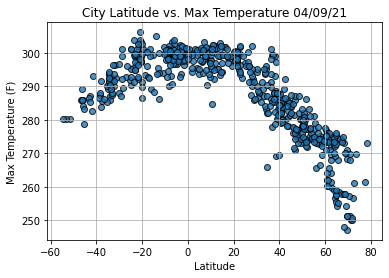

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

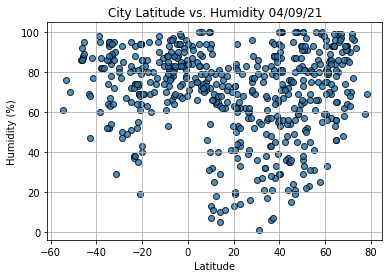

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

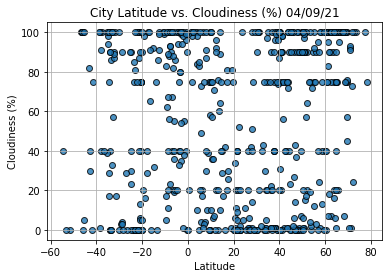

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

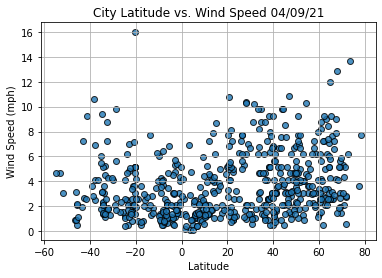

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

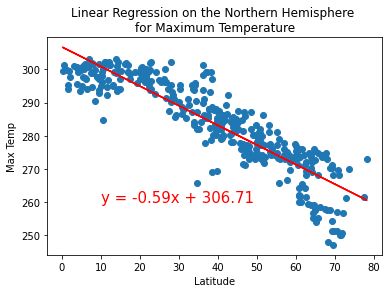

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10, 260))

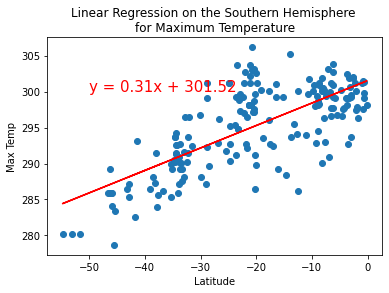

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,300))

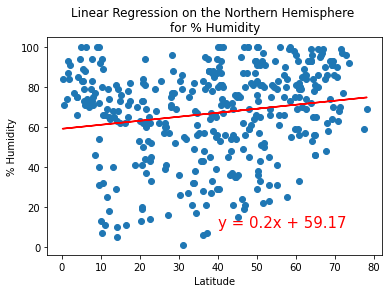

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

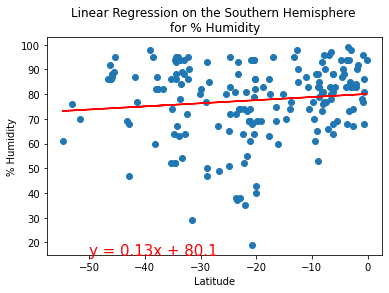

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

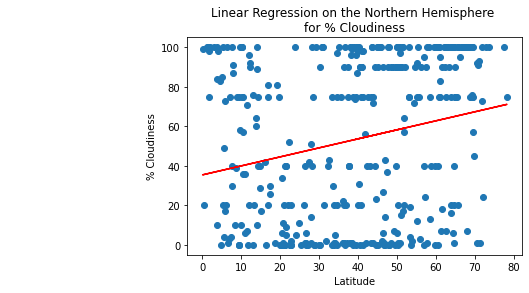

In [27]:
# Linear regression on the Norther Hemisphere %CLOUDINESS 6.4.4
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

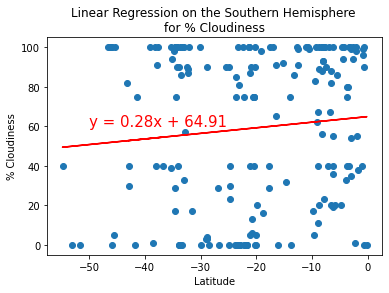

In [28]:
# Linear regression on the Southern Hemisphere 6.4.4
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

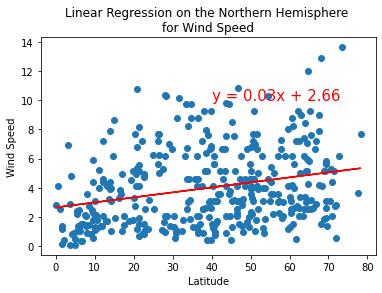

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,10))

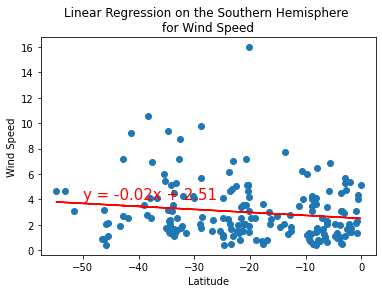

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,4))